In [127]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# Dataset and Train-Test function
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
# Preprocessing
from sklearn.preprocessing import LabelEncoder
# Classifactions sklearn
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc
# Classification Keras + Tensorflow + Torch
import torch 
import torch.utils
import torch.nn as nn 
import torch.utils.data
import tensorflow as tf
import torch.optim as optim 
import torchvision.models as models
from tensorflow.keras import Sequential
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Esta es la parte del análisis de los diversos tipos de clasificación sobre los que vamos a trabajar. Estos tipos son:
- SVC ( Support Vector Machine )
- LogisticalRegression
- NN ( Neural Network )
- CNN ( Convolutional Neural Network)

Dentro de cada unos de los modelos de clasificación que vamos a utilizar, vamos a realizar 3 métodos para elaborar sus resultados:
- Holdout
- Resubstitution
- Cross-Validation

En el apartado de métricas a utilizar, nos hemos decantado por las siguientes para su uso en todos los modelos:
- Dentro del propio classifiation_report:
  - Precision 
  - Recall
  - F1-Score
- Roc_Auc_Score
- Accuracy_Score

<label style='color:red'>Explicación de las métricas</label>

<label style='color:red'>Explicación de los 3 métodos</label>

##### Load Dataset

In [128]:
lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=.4)
X, y = lfw_people.images, lfw_people.target
X.shape, y.shape

((1456, 50, 37), (1456,))

The shape show us that we have a dataset with 1456 images with a 50x37 pixel resolution

##### Positive-Negative Image

Text(0.5, 1.0, 'Negative class Image')

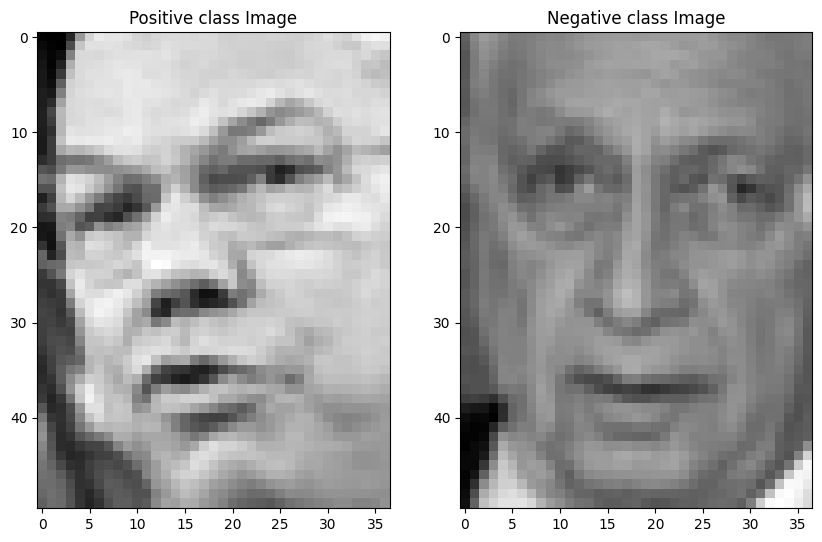

In [129]:
# Plot a positive and negative image for classifications purposes
plt.figure(figsize=(10,10))
# Positive
plt.subplot(1,2,1)
plt.imshow(X[y==1][0], cmap='gray')
plt.title('Positive class Image')
# Negative
plt.subplot(1,2,2)
plt.imshow(X[y==0][0], cmap='gray')
plt.title('Negative class Image')

In [130]:
# This will show us if we are ir [0,1] range or [0, 255]
np.min(X),np.max(X)

(0.0, 1.0)

As we can see, we don't have to normalize the images to [0, 1] range cause we already are in it

In [131]:
# We want to know how many people we have in the dataset to classify
len(np.unique(y))

10

### First dataset implementations

#### Data preprocessing

In [132]:
X_reshape = X.reshape((X.shape[0], -1 )) # Flatten image

labelEncoder = LabelEncoder()
y_encoded = labelEncoder.fit_transform(y)
X_reshape.shape, y_encoded.shape

((1456, 1850), (1456,))

#### Split the dataset

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_encoded, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1164, 1850), (292, 1850), (1164,), (292,))

#### Classifiers

##### SVC ( Support Vector Machines)

<label style='color:red'>Explicación del SVC</label>

In [134]:
svm_classifier = SVC()

svm_classifier.fit(X_train, (y_train==1))

SVC()

In [135]:
y_pred = svm_classifier.predict(X_test)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==1, y_pred)}')
print(f'\nConfusion-Matrix: \n{confusion_matrix(y_test==1, y_pred)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==1, y_pred)}')  
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==1, y_pred)}')

Results:
Classification-Report:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       246
        True       1.00      0.63      0.77        46

    accuracy                           0.94       292
   macro avg       0.97      0.82      0.87       292
weighted avg       0.95      0.94      0.94       292


Confusion-Matrix: 
[[246   0]
 [ 17  29]]

ROC-AUC-Score: 
0.8152173913043479

Accuracy-Score: 
0.9417808219178082


<label style='color:red'>Explicación de resultados</label>

##### Logistic Regression 

<label style='color:red'>Explicación de la Regresión Logistica</label>

In [136]:
logisticClassifier = LogisticRegression()

logisticClassifier.fit(X_train, (y_train==1))

LogisticRegression()

In [137]:
y_pred = logisticClassifier.predict(X_test)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==1, y_pred)}')
print(f'\nConfusion-Matrix: \n{confusion_matrix(y_test==1, y_pred)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==1, y_pred)}')
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==1, y_pred)}')

Results:
Classification-Report:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       246
        True       0.86      0.83      0.84        46

    accuracy                           0.95       292
   macro avg       0.92      0.90      0.91       292
weighted avg       0.95      0.95      0.95       292


Confusion-Matrix: 
[[240   6]
 [  8  38]]

ROC-AUC-Score: 
0.9008483563096501

Accuracy-Score: 
0.952054794520548


<label style='color:red'>Explicación de resultados</label>

##### Neural Network

<label style='color:red'>Explicación de Red neuronal</label>

In [138]:
# Aqui pasamos a one-hot encoding las etiquetas para poder diferenciar las 10 clases de las im'agenes
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

<label style='color:red'>Explicación del porqué de la estructura de la red</label>

In [139]:
neuralModelo = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
neuralModelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
neuralModelo.summary()

x:\Repos\DMandML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 64)             │       118,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,402 (489.85 KB)

 Trainable params: 125,402 (489.85 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
history = neuralModelo.fit(X_train, (y_train), epochs=1000, batch_size=64, validation_split=.2)

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2523 - loss: 2.1700 - val_accuracy: 0.3820 - val_loss: 2.0065
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3712 - loss: 2.0198 - val_accuracy: 0.3820 - val_loss: 1.9665
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3448 - loss: 2.0205 - val_accuracy: 0.3820 - val_loss: 1.9356
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3747 - loss: 1.9478 - val_accuracy: 0.3820 - val_loss: 1.9031
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3538 - loss: 1.9441 - val_accuracy: 0.3948 - val_loss: 1.8789
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3695 - loss: 1.8964 - val_accuracy: 0.3906 - val_loss: 1.8356
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3652 - loss: 1.9343 - val_accuracy: 0.3991 - val_loss: 1.8860
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3605 - loss: 1.8951 - val_accuracy: 0

In [141]:
y_pred_neural = neuralModelo.predict(X_test).astype(int)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==1, y_pred_neural)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==1, y_pred_neural)}')
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==1, y_pred_neural)}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Results:
Classification-Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.24        14
           1       0.93      0.59      0.72        46
           2       1.00      0.27      0.42        26
           3       0.92      0.67      0.78       106
           4       1.00      0.09      0.17        11
           5       0.78      0.41      0.54        17
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        18
           8       0.50      0.08      0.14        12
           9       1.00      0.18      0.31        33

   micro avg       0.91      0.42      0.57       292
   macro avg       0.68      0.24      0.33       292
weighted avg       0.82      0.42      0.52       292
 samples avg       0.42      0.42      0.42       292


ROC-AUC-Score: 
0.6190925821280732

Accuracy-Score: 
0.4178082191780822


x:\Repos\DMandML\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
x:\Repos\DMandML\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<label style='color:red'>Explicación de los resultados</label>

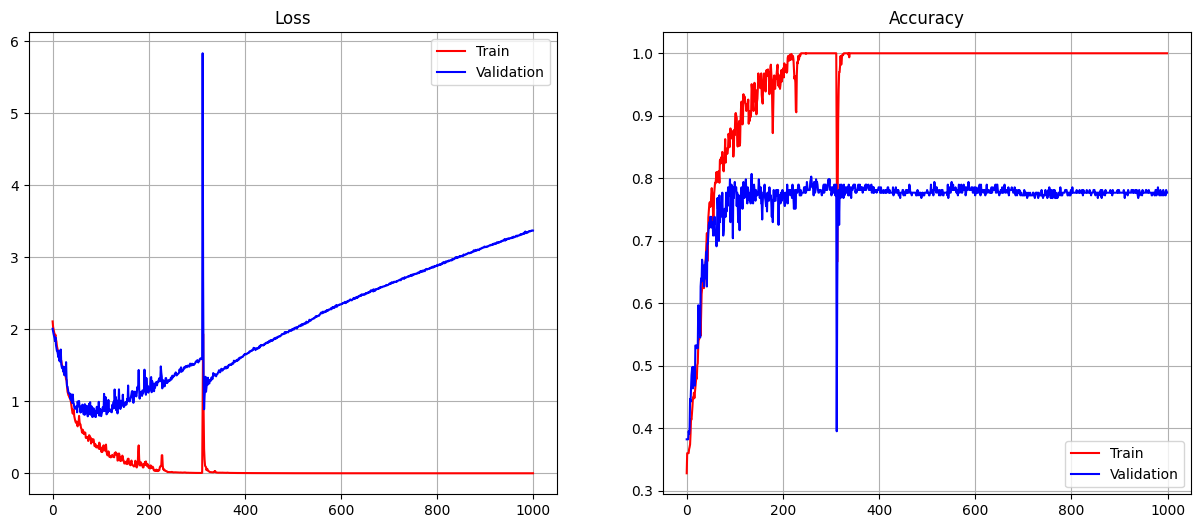

In [142]:
plt.figure(figsize=(15,6))
# Subplot for loss 
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train', c='red')
plt.plot(history.history['val_loss'], label='Validation', c='blue')
plt.title('Loss')
plt.grid(True)
plt.legend()
# Subplot for accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train', c='red')
plt.plot(history.history['val_accuracy'], label='Validation', c='blue')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

<label style='color:red'>Explicación de la gráfica</label>

In [143]:
acierto, fallo = 0,0

for a,b in zip(y_pred_neural, y_test):
    if(b[1]==1):
        #7print(a, '\t', b)
        if (a[1]==1):
            acierto +=1
        else:
            fallo += 1
print(f"Acierto (%total) = {acierto} ({acierto+fallo}) -->  {acierto/(acierto+fallo)*100:.4f}%")

Acierto (%total) = 27 (46) -->  58.6957%


#### CNN (propia)

<label style='color:red'>Explicación de una red convolucional</label>

In [273]:
# Vamos a volver a cargar los datos para pasarlo a los tensores necesarios parar que funcione el algoritmo

lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=.4)
X, y = lfw_people.images, lfw_people.target


In [274]:
# aplicamos un encoder sobre los labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [275]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1164, 50, 37), (292, 50, 37), (1164,), (292,))

In [276]:
# Agregamos una dimension adicional para el canal de color (estamos originalmente en una escala de grises)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_train.shape, X_test.shape

((1164, 50, 37, 1), (292, 50, 37, 1))

In [277]:
# Cambiamos a one hot enconding las etiquetas
y_train =   to_categorical(y_train)
y_test =    to_categorical(y_test)

<label style='color:red'>Explicación del porqué de la forma de la CNN</label>

In [293]:
# Definimos el modelo
#
num_epochs = 100
#
modeloCNN = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=( X_train.shape[1], X_train.shape[2], 1) ),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')
    ])
#
modeloCNN.summary()
#
modeloCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#
earlyStop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
historyCNN = modeloCNN.fit(X_train, y_train==1, epochs=num_epochs, batch_size=32, validation_split=.25)

x:\Repos\DMandML\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 48, 35, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 24, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_39 (Flatten)            │ (None, 26112)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 32)             │       835,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 837,642 (3.20 MB)

 Trainable params: 837,642 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1503 - loss: 0.4249 - val_accuracy: 0.3814 - val_loss: 0.2876
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3354 - loss: 0.2967 - val_accuracy: 0.3814 - val_loss: 0.2790
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3825 - loss: 0.2807 - val_accuracy: 0.3814 - val_loss: 0.2770
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3551 - loss: 0.2780 - val_accuracy: 0.4021 - val_loss: 0.2642
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3549 - loss: 0.2729 - val_accuracy: 0.3986 - val_loss: 0.2546
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4121 - loss: 0.2541 - val_accuracy: 0.4467 - val_loss: 0.2443
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4479 - loss: 0.2476 - val_accuracy: 0.4708 - val_loss: 0.2319
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4891 - loss: 0.2275 - val_accuracy: 0.

In [297]:
y_pred_CNN = modeloCNN.predict(X_test).astype(int)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==1, y_pred_CNN)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==1, y_pred_CNN)}')
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==1, y_pred_CNN)}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Results:
Classification-Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       1.00      0.48      0.65        46
           2       1.00      0.15      0.27        26
           3       1.00      0.58      0.73       106
           4       0.00      0.00      0.00        11
           5       1.00      0.12      0.21        17
           6       1.00      0.22      0.36         9
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        12
           9       1.00      0.09      0.17        33

   micro avg       1.00      0.32      0.49       292
   macro avg       0.60      0.16      0.24       292
weighted avg       0.81      0.32      0.43       292
 samples avg       0.32      0.32      0.32       292


ROC-AUC-Score: 
0.5819178546739711

Accuracy-Score: 
0.3219178082191781


x:\Repos\DMandML\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
x:\Repos\DMandML\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<label style='color:red'>Explicación de resultados</label>

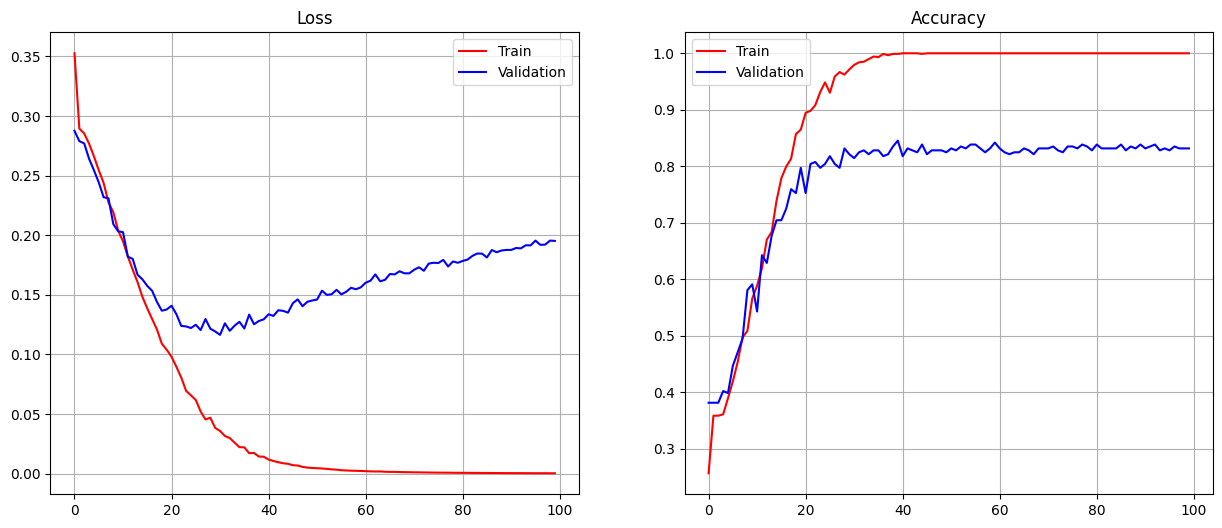

In [298]:

plt.figure(figsize=(15,6))
# Subplot for loss 
plt.subplot(1,2,1)
plt.plot(historyCNN.history['loss'], label='Train', c='red')
plt.plot(historyCNN.history['val_loss'], label='Validation', c='blue')
plt.title('Loss')
plt.grid(True)
plt.legend()
# Subplot for accuracy
plt.subplot(1,2,2)
plt.plot(historyCNN.history['accuracy'], label='Train', c='red')
plt.plot(historyCNN.history['val_accuracy'], label='Validation', c='blue')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

<label style='color:red'>Explicación de la gráfica</label>

In [299]:
acierto, fallo = 0, 0

for a,b in zip(y_pred_CNN, y_test):
    if(b[1]==1):
        #7print(a, '\t', b)
        if (a[1]==1):
            acierto +=1
        else:
            fallo += 1
print(f"Aciertos | Fallos (%total) = {acierto} | {fallo} ({acierto/(acierto+fallo)*100:.4f}%)")

Aciertos | Fallos (%total) = 22 | 24 (47.8261%)
